In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = os.listdir('/content/drive/MyDrive/three_final')
print(dataset_path)

['sad', 'neutral', 'happy']


In [ ]:
import cv2
import dlib
from tensorflow.keras.preprocessing import image
import math
# from mlxtend.image import extract_face_landmarks
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# image = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/three/sad/01da087c8d1c47e1a4af2af82aea34a7.jpg'), cv2.COLOR_BGR2RGB)
# plt.imshow(image)

In [ ]:
# !wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

In [ ]:
# !bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

# datFile =  "/content/shape_predictor_68_face_landmarks.dat"

In [ ]:
# # 얼굴 감지기 초기화
# detector = dlib.get_frontal_face_detector()

# # 얼굴 랜드마크 예측기 초기화
# predictor_path = datFile
# predictor = dlib.shape_predictor(predictor_path)

# # 입력 폴더와 출력 폴더 경로 설정
# input_folder = '/content/drive/MyDrive/three_origin/happy'
# output_folder = '/content/drive/MyDrive/three_origin/happy_new'

# # 출력 폴더가 없으면 생성
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# # 입력 폴더의 이미지 파일 목록 가져오기
# image_files = [f for f in os.listdir(input_folder) if f.endswith('.jpg') or f.endswith('.png')]

# # 이미지 파일별로 얼굴 crop하여 저장
# for image_file in image_files:
#     # 이미지 파일 경로
#     image_path = os.path.join(input_folder, image_file)

#     # 이미지 불러오기
#     image = cv2.imread(image_path)

#     # 이미지의 얼굴 감지
#     faces = detector(image)

#     # 얼굴이 감지되지 않은 경우 스킵
#     if len(faces) == 0:
#         continue

#     # 첫 번째 얼굴의 랜드마크 예측
#     landmarks = predictor(image, faces[0])

#     # 얼굴 영역 좌표 추출
#     x1 = landmarks.part(0).x
#     y1 = landmarks.part(0).y
#     x2 = landmarks.part(16).x
#     y2 = landmarks.part(8).y

#     # 얼굴 crop
#     cropped_face = image[y1:y2, x1:x2]

#     # 출력 파일 경로
#     output_path = os.path.join(output_folder, image_file)

#     # crop된 얼굴 저장
#     cv2.imwrite(output_path, cropped_face)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
class_labels = []

for item in dataset_path:
  all_classes = os.listdir('/content/drive/MyDrive/three_final'+'/' + item)
  print(all_classes)

  for room in all_classes:
    class_labels.append((item, str('/content/drive/MyDrive/three_final' + '/' + item) + '/' + room))

['sad_1592.jpg', 'sad_1593.jpg', 'sad_1594.jpg', 'sad_1595.jpg', 'sad_1596.jpg', 'sad_1597.jpg', 'sad_1598.jpg', 'sad_1599.jpg', 'sad_1600.jpg', 'sad_1602.jpg', 'sad_1604.jpg', 'sad_1605.jpg', 'sad_1606.jpg', 'sad_1607.jpg', 'sad_1612.jpg', 'sad_1613.jpg', 'sad_1614.jpg', 'sad_1615.jpg', 'sad_1616.jpg', 'sad_1618.jpg', 'sad_1621.jpg', 'sad_1622.jpg', 'sad_1623.jpg', 'sad_1626.jpg', 'sad_1627.jpg', 'sad_1629.jpg', 'sad_1630.jpg', 'sad_1631.jpg', 'sad_1632.jpg', 'sad_1634.jpg', 'sad_1635.jpg', 'sad_1636.jpg', 'sad_1637.jpg', 'sad_1638.jpg', 'sad_1639.jpg', 'sad_1640.jpg', 'sad_1641.jpg', 'sad_1642.jpg', 'sad_1643.jpg', 'sad_1644.jpg', 'sad_1646.jpg', 'sad_1648.jpg', 'sad_1649.jpg', 'sad_1650.jpg', 'sad_1651.jpg', 'sad_1652.jpg', 'sad_1653.jpg', 'sad_1654.jpg', 'sad_1655.jpg', 'sad_1659.jpg', 'sad_1660.jpg', 'sad_1663.jpg', 'sad_1664.jpg', 'sad_1665.jpg', 'sad_1667.jpg', 'sad_1668.jpg', 'sad_1669.jpg', 'sad_1670.jpg', 'sad_1671.jpg', 'sad_1672.jpg', 'sad_1673.jpg', 'sad_1674.jpg', 'sad_16

In [ ]:
df = pd.DataFrame(data = class_labels, columns = ['Labels', 'image'])
print(df.head())

  Labels                                              image
0    sad  /content/drive/MyDrive/three_final/sad/sad_159...
1    sad  /content/drive/MyDrive/three_final/sad/sad_159...
2    sad  /content/drive/MyDrive/three_final/sad/sad_159...
3    sad  /content/drive/MyDrive/three_final/sad/sad_159...
4    sad  /content/drive/MyDrive/three_final/sad/sad_159...


In [ ]:
df.tail()

,Labels,image
6976,happy,/content/drive/MyDrive/three_final/happy/happy...
6977,happy,/content/drive/MyDrive/three_final/happy/happy...
6978,happy,/content/drive/MyDrive/three_final/happy/happy...
6979,happy,/content/drive/MyDrive/three_final/happy/happy...
6980,happy,/content/drive/MyDrive/three_final/happy/happy...


In [ ]:
# augmentation
# def show_aug_image(image, generator, n_images=4):

#     # ImageDataGenerator는 여러개의 image를 입력으로 받기 때문에 4차원으로 입력 해야함.
#     image_batch = np.expand_dims(image, axis=0)

#     # featurewise_center or featurewise_std_normalization or zca_whitening 가 True일때만 fit 해주어야함
#     generator.fit(image_batch)

#     # flow로 image batch를 generator에 넣어주어야함.
#     data_gen_iter = generator.flow(image_batch)

#     fig, axs = plt.subplots(nrows=1, ncols=n_images, figsize=(24, 8))

#     for i in range(n_images):
#     	#generator에 batch size 만큼 augmentation 적용(매번 적용이 다름)
#         aug_image_batch = next(data_gen_iter)
#         aug_image = np.squeeze(aug_image_batch)
#         aug_image = aug_image.astype('int')
#         axs[i].imshow(aug_image)

# data_generator = ImageDataGenerator(
#     horizontal_flip=True,
#     rotation_range=20,
#     brightness_range=(0.7, 1.3),
#     zoom_range=[0.5, 1.1])
# show_aug_image(image, data_generator, n_images=4)

In [ ]:
# from PIL import Image

# image1 = Image.open('/content/drive/MyDrive/datacapstone/sad/01da087c8d1c47e1a4af2af82aea34a7.jpg')

# image1.show()

# imag1_size = image1.size

# print(imag1_size)


In [ ]:
print('total num of images in the dataset : ', len(df))

label_count = df['Labels'].value_counts()
print(label_count)

total num of images in the dataset :  6981
neutral    2410
happy      2327
sad        2244
Name: Labels, dtype: int64


In [ ]:
import cv2
path = '/content/drive/MyDrive/three_final/'
dataset_path = os.listdir('/content/drive/MyDrive/three_final/')

im_size = 224

images = []
labels = []

for i in dataset_path:
  data_path = path + str(i)
  filenames = [i for i in os.listdir(data_path)]

  for f in filenames:
    img = cv2.imread(data_path +'/' + f)
    img = cv2.resize(img, (im_size, im_size))
    images.append(img)
    labels.append(i)

In [ ]:
# plt.imshow(images[3000])
# plt.show

In [ ]:
images = np.array(images)
images = images.astype('float32') / 255.0
images.shape

(6981, 224, 224, 3)

In [ ]:
images[5].shape

(224, 224, 3)

In [ ]:
# augmented_images = []
# augmented_labels = []

# for i in range(len(images)):
#     # Grayscale 변환
#     gray_img = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)

#     # 좌우 반전
#     flipped_img = cv2.flip(gray_img, 1)

#     # 데이터셋에 추가
#     augmented_images.append(gray_img)
#     augmented_labels.append(labels[i])
#     augmented_images.append(flipped_img)
#     augmented_labels.append(labels[i])

# # 리스트를 numpy 배열로 변환
# augmented_images = np.array(augmented_images)
# augmented_labels = np.array(augmented_labels)

# # 이미지를 (샘플 수, 224, 224, 1) 형태로 reshape
# augmented_images = augmented_images.reshape(-1, im_size, im_size, 1)
# augmented_images = augmented_images.astype('float32') / 255.0

# print(augmented_images.shape)
# print(augmented_labels.shape)

In [ ]:
# augmented_labels[1]

In [ ]:
# df['Labels'].tail()

In [ ]:
# new_df = pd.DataFrame({'Labels': df['Labels'].repeat(2)})

# # 결과 출력
# print(new_df)

In [ ]:
# df = new_df.reset_index(drop=True)

# # 결과 출력
# print(df)

In [ ]:
label_count = df['Labels'].value_counts()
print(label_count)

neutral    2410
happy      2327
sad        2244
Name: Labels, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

y = df['Labels'].values
y_labelencoder = LabelEncoder()

In [ ]:
y

array(['sad', 'sad', 'sad', ..., 'happy', 'happy', 'happy'], dtype=object)

In [ ]:
y = y_labelencoder.fit_transform(y)
y

array([2, 2, 2, ..., 0, 0, 0])

In [ ]:
print("sad", labels[5])
print("neutral", labels[3000])
print("happy", labels[6000])

sad sad
neutral neutral
happy happy


In [ ]:
y = y_labelencoder.fit_transform(y)
y = y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('ohe', OneHotEncoder(), [0])], remainder='passthrough')
print(ct)
Y = ct.fit_transform(y)
print(Y[:2]) #sad, 2
print(Y[3000:3002]) #neutral 1
print(Y[5000:5002]) # happy 0

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(), [0])])
[[0. 0. 1.]
 [0. 0. 1.]]
[[0. 1. 0.]
 [0. 1. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, Y = shuffle(images, Y, random_state = 1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.1, random_state=415)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.25, random_state=1)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(val_x.shape)
print(val_y.shape)

(4711, 224, 224, 3)
(4711, 3)
(699, 224, 224, 3)
(699, 3)
(1571, 224, 224, 3)
(1571, 3)


In [ ]:
# y = df['Labels'].values
# y_labelencoder = LabelEncoder()

# y = y_labelencoder.fit_transform(y)
# print(y)

In [ ]:
# y = y.reshape(-1,1)
#  from sklearn.compose import ColumnTransformer
# ct = ColumnTransformer([('ohe', OneHotEncoder(), [0])], remainder='passthrough')
# print(ct)
# Y = ct.fit_transform(y)
# print(Y[:5])

In [ ]:
# train_generator = data_generator.flow(train_x, train_y, batch_size = 16, subset="training")
# valid_generator = data_generator.flow(train_x, train_y, batch_size = 16, subset="training")

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from keras.callbacks import  EarlyStopping

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE,IMG_SIZE)

inputs = layers.Input(shape=(IMG_SIZE,IMG_SIZE,3))

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [ ]:
early_stopping = EarlyStopping(monitor='loss', patience=10, mode='min')

In [ ]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

hist = model.fit(train_x, train_y, batch_size=8, epochs=300, verbose=2, callbacks=[early_stopping])

from tensorflow.python.keras.models import load_model
model.save('three_landmark_epoch300_patience10_val0.25.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 3)                4053414   
                                                                 
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/300
589/589 - 69s - loss: 1.7544 - accuracy: 0.4540 - 69s/epoch - 118ms/step
Epoch 2/300
589/589 - 24s - loss: 0.8699 - accuracy: 0.6111 - 24s/epoch - 41ms/step
Epoch 3/300
589/589 - 24s - loss: 0.6661 - accuracy: 0.7054 - 24s/epoch - 41ms/step
Epoch 4/300
589/589 - 24s - loss: 0.5675 - accuracy: 0.7570 - 24s/epoch - 41ms/step
Epoch 5/300
589/589 - 24s - loss: 0.5183 - accuracy: 0.7854 - 24s/epoch - 41ms/step
Epoch 6/300
589/589 -

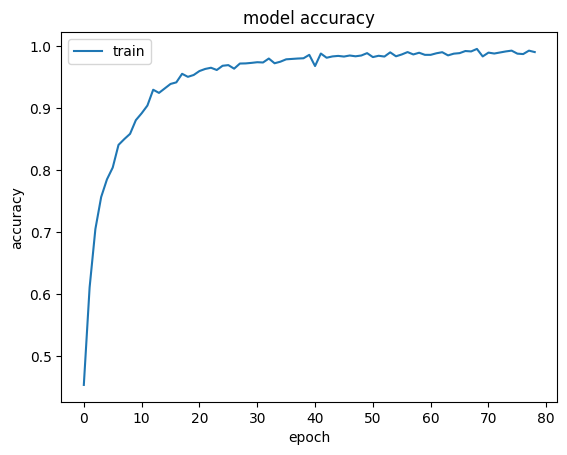

In [ ]:
def plot_hist(hist):
  plt.plot(hist.history['accuracy'])
  plt.title("model accuracy")
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

plot_hist(hist)

In [ ]:
preds = model.evaluate(test_x, test_y)
print("Loss = " + str(preds[0]))
print("Test accuracy = " + str(preds[1]))

22/22 [==============================] - 2s 20ms/step - loss: 1.2244 - accuracy: 0.7439
Loss = 1.22439706325531
Test accuracy = 0.7439199090003967


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 3)                4053414   
                                                                 
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

class ImageAnalyzer:
    def __init__(self, model_path):
        self.model = load_model(model_path)
        self.class_labels = ['happy', 'neutral', 'sad']  # 클래스 레이블을 설정해주세요.

    def analyze_image(self, image_path):
        img = cv2.imread(image_path)
        img = cv2.resize(img, (224, 224))
        img = img.astype('float32') / 255.0
        img = np.expand_dims(img, axis=0)

        prediction = self.model.predict(img)
        class_index = np.argmax(prediction)
        class_label = self.class_labels[class_index]

        return class_label


In [ ]:
model_path = 'three_landmark_epoch200_patience8.h5'
image_path = '/content/drive/MyDrive/three_final/sad/sad_2930.jpg'

analyzer = ImageAnalyzer(model_path)
predicted_class = analyzer.analyze_image(image_path)
print("Predicted class:", predicted_class)


1/1 [==============================] - 2s 2s/step
Predicted class: sad


In [ ]:
from tensorflow.keras.models import load_model

model = load_model(model_path)
optimizer = model.optimizer
print(optimizer)
